<h2 align="center" style="font-weight:bold">Phase 2: A/B Testing</h2>

### **Business Analysis and launch of AB testing: Targeting Untapped Market**

**Insights specific to customers with age group of 18 - 25**
1. People with age group of 18 -25 accounts to ~25% of customer base in the data
2. Avg annual income of this age group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and max credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Avg transaction amount made with credit cards is also low compared to other groups
5. Top 3 most used shopping products categories  : Electronics, Fashion & Apparel, Beauty & Personal care

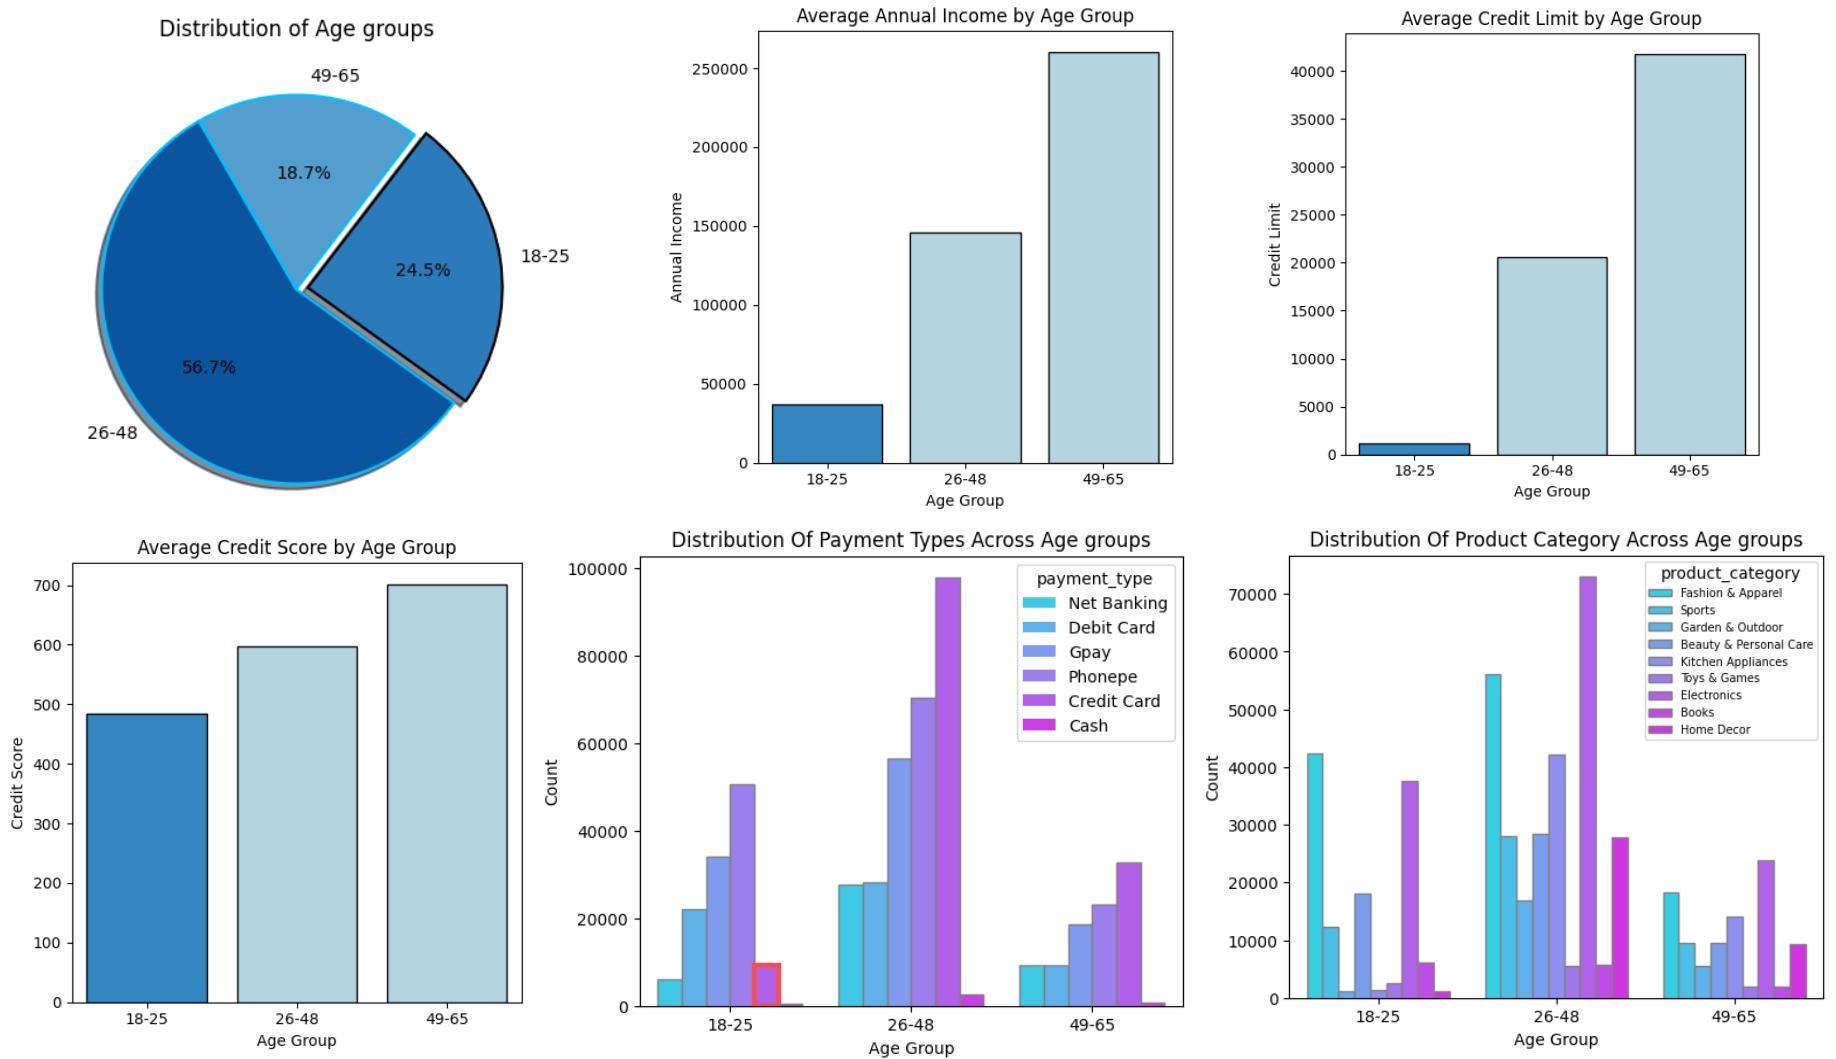

### **Pre-Campaign**

To support A/B testing for the new credit card trial, a sample size determination was conducted to ensure sufficient data for reliable analysis.

In [1]:
# import required libraries
import statsmodels.stats.api as sms
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [2]:
alpha = 0.05
power = 0.8
effect_size = 0.4

In [3]:
samp_size=sms.tt_ind_solve_power(effect_size=effect_size,power=power,alpha=alpha)
samp_size

99.08032683981116

In [4]:
# Calculate the required sample size for different effect sizes
effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] # std dev greater than control group 

In [5]:
for effect_size in effect_sizes:
    samp_size=sms.tt_ind_solve_power(effect_size=effect_size,power=power,alpha=alpha)
    print(f'Effect size: {effect_size}, Required Sample Size: {int(samp_size)} Customers')   

Effect size: 0.1, Required Sample Size: 1570 Customers
Effect size: 0.2, Required Sample Size: 393 Customers
Effect size: 0.3, Required Sample Size: 175 Customers
Effect size: 0.4, Required Sample Size: 99 Customers
Effect size: 0.5, Required Sample Size: 63 Customers
Effect size: 0.6, Required Sample Size: 44 Customers
Effect size: 0.7, Required Sample Size: 33 Customers
Effect size: 0.8, Required Sample Size: 25 Customers
Effect size: 0.9, Required Sample Size: 20 Customers
Effect size: 1, Required Sample Size: 16 Customers


Taking into account budgetary limitations and the practical relevance of the expected effect size (0.6), a total sample size of approximately 40 customers was determined to be both feasible and statistically appropriate for the test.


### **Forming control and test groups**

From a pool of 246 customers aged 18–25, **80 customers were randomly selected and evenly split** into:

* **Test Group (n = 40):** Received the credit card campaign.
* **Control Group (n = 40):** Received no campaign exposure.

Group sizes were determined based on effect size estimates and budget constraints.

The campaign ran for the **test group** from **October to December 2023**. The **control group** remained unexposed throughout.

### **Post-Campaign**

At the end of the two-month campaign period (from 09-10-2023 to 11-10-2023), daily data was collected showing the average transaction amounts made by the 40 customers in both the control and test groups, using existing and newly launched credit cards, respectively.

> The key performance indicator (KPI) for this A/B test is focused on enhancing the average transaction amounts facilitated by the new card.


In [6]:
df=pd.read_csv('Resource/datasets/avg_transactions_after_campaign.csv')

In [7]:
df.shape

(62, 3)

In [8]:
df.head()

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,259.83,277.32
1,2023-09-11,191.27,248.68
2,2023-09-12,212.41,286.61
3,2023-09-13,214.92,214.85
4,2023-09-14,158.55,344.08


In [9]:
cols = ['control_group_avg_tran', 'test_group_avg_tran']

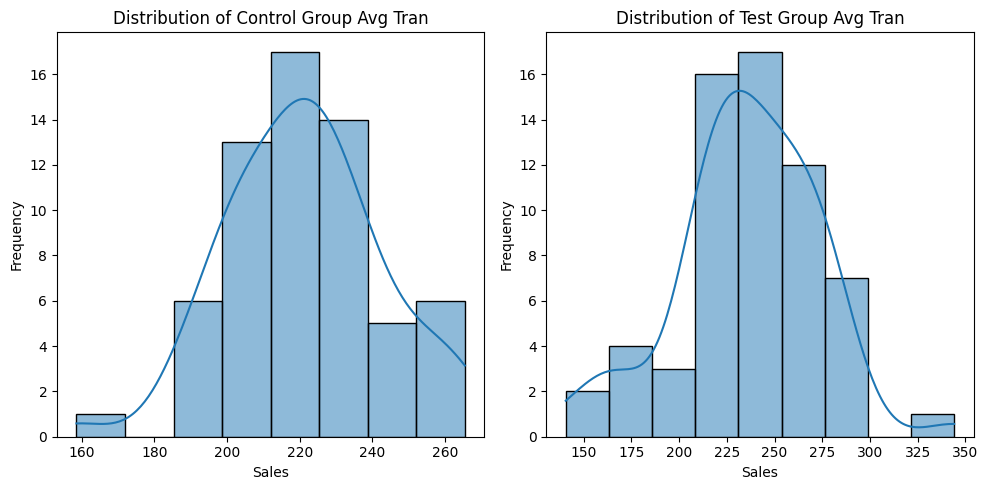

In [10]:
plt.rcParams['figure.figsize'] = [10, 5]
for i, col in enumerate(cols, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}') 
    plt.xlabel('Sales')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [11]:
round(df[df['test_group_avg_tran']>df['control_group_avg_tran']].shape[0]/df.shape[0]*100,2)

70.97

Approximately **70.97%** of the days recorded higher average transaction amounts in the **test group** compared to the **control group**.

### **Checking for Normality Using the Shapiro-Wilk Test**

**Objective**: To determine whether the data in the `control` and `test` groups follow a normal distribution using the Shapiro-Wilk test.

#### **Hypotheses:**

1. **Null Hypothesis (H₀):** The data in the group is normally distributed.
2. **Alternative Hypothesis (H₁):** The data in the group is not normally distributed.


In [12]:
control = df['control_group_avg_tran']
test = df['test_group_avg_tran']

In [13]:
control_stat, control_p = st.shapiro(control)
test_stat, test_p = st.shapiro(test)

In [14]:
print(f"Control Group: Test Statistic = {control_stat:.4f}, p-value = {control_p:.4f}")
print(f"Test Group: Test Statistic = {test_stat:.4f}, p-value = {test_p:.4f}")

Control Group: Test Statistic = 0.9848, p-value = 0.6368
Test Group: Test Statistic = 0.9673, p-value = 0.0968


In [15]:
alpha = 0.05

In [16]:
if control_p > alpha:
    print("Control group: Fail to reject H₀ (data is normally distributed).")
else:
    print("Control group: Reject H₀ (data is not normally distributed).")

if test_p > alpha:
    print("Test group: Fail to reject H₀ (data is normally distributed).")
else:
    print("Test group: Reject H₀ (data is not normally distributed).")

Control group: Fail to reject H₀ (data is normally distributed).
Test group: Fail to reject H₀ (data is normally distributed).


**Conclusion**: Based on the Shapiro-Wilk test, both the control group and test group data are normally distributed ($p > 0.05$). Therefore, parametric tests that assume normality, such as the t-test, can be applied to analyze these groups.


### **Testing for Homogeneity of Variances Using Levene's Test**

**Objective**: To determine whether the variances of the `control` and `test` groups are equal using Levene's test.

#### **Hypotheses:**

1. **Null Hypothesis (H₀):** The variances of the control and test groups are equal.
2. **Alternative Hypothesis (H₁):** The variances of the control and test groups are not equal.

In [17]:
stat, p_value = st.levene(control, test)

In [18]:
print(f"Levene's Test Statistic = {stat:.4f}, p-value = {p_value:.4f}")

Levene's Test Statistic = 10.5570, p-value = 0.0015


In [19]:
alpha = 0.05  # significance level
if p_value > alpha:
    print("Fail to reject H₀ (variances are equal).")
else:
    print("Reject H₀ (variances are not equal).")

Reject H₀ (variances are not equal).


**Conclusion**: Based on Levene's test, the p-value ($p = 0.0015$) is less than the significance level ($\alpha = 0.05$). Therefore, the null hypothesis of equal variances is rejected, indicating that the control and test groups do not have equal variances. A parametric test that does not assume equal variances, such as Welch's t-test, should be used for further analysis.


### **Hypothesis Testing**

**Two-sample t-test** because:

* It compares the **means** of two **independent groups** (control vs. test).
* The **population standard deviation is unknown**.

### **Two-Sample T-Test**

**Objective**: To determine if the average transaction amount in the test group is significantly greater than the control group.


#### **Hypotheses:**

1. **Null Hypothesis (H₀):** The average transaction amount in the test group is less than or equal to the average in the control group ($\mu_{\text{test}} \leq \mu_{\text{control}}$).
2. **Alternative Hypothesis (H₁):** The average transaction amount in the test group is greater than the average in the control group ($\mu_{\text{test}} > \mu_{\text{control}}$).

This is a **one-tailed test**, as it specifically evaluates whether there is an increase in the test group's average.

In [20]:
stat, p_value = st.ttest_ind(test, control, equal_var=False, alternative='greater')

In [21]:
print(f"T-Test Statistic = {stat:.4f}, p-value = {p_value:.4f}")

T-Test Statistic = 2.7483, p-value = 0.0036


In [22]:
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject H₀: The test group has a significantly greater average transaction amount.")
else:
    print("Fail to reject H₀: No significant difference in average transaction amounts.")

Reject H₀: The test group has a significantly greater average transaction amount.


**Conclusion**: Based on the results of the two-sample t-test, the test statistic ($T = 2.7483$) and the p-value ($p = 0.0036$) indicate that the p-value is less than the significance level ($\alpha = 0.05$). Therefore, the null hypothesis ($H₀$) is rejected.

This result suggests that the average transaction amount in the test group is significantly greater than that of the control group. The new credit card appears to have a positive impact on transaction amounts, making it a promising option for broader implementation.


### **Calculating the Confidence Interval for the Test Group Mean**

**Objective**: To calculate the 95% confidence interval for the mean transaction amount in the test group, which provides a range of plausible values for the true mean.

The confidence interval for the mean is calculated using the formula:

$$
CI = \left[ \text{mean} \pm t^* \times \frac{s}{\sqrt{n}} \right]
$$

Where:

* $\text{mean}$ is the sample mean.
* $t^*$ is the critical value from the t-distribution for a given confidence level ($\alpha = 0.05$).
* $s$ is the sample standard deviation.
* $n$ is the sample size.


In [23]:
test_mean = np.mean(test)
test_std = np.std(test, ddof=1)  
sample_size = len(test)
confidence = 0.95

In [24]:
ci = st.t.interval(
    confidence=confidence, 
    df=sample_size-1, 
    loc=test_mean, 
    scale=test_std/np.sqrt(sample_size)
)

In [25]:
print(f"Test Group Mean = {test_mean:.2f}")
print(f"95% Confidence Interval = ({ci[0]:.2f}, {ci[1]:.2f})")

Test Group Mean = 235.98
95% Confidence Interval = (226.67, 245.29)


**Interpretation and Conclusion:**

The test group's mean transaction amount is $235.98$, with a 95% confidence interval of $(226.67, 245.29)$. Since the entire confidence interval lies above the control group’s mean transaction amount of $221.18$, this indicates that the test group **outperforms the control group**, even when accounting for sampling variability.


**In Context**:

* The t-test showed a statistically significant increase in the test group’s average transaction amount compared to the control group ($p = 0.0036$).
* The test group’s confidence interval ($226.67, 245.29$) is entirely above the control group’s mean ($221.18$), further validating the increase in transaction amounts due to the new credit card.

**Final Conclusion**:
The test group’s significantly higher mean ($235.98$) and confidence interval above the control group’s mean demonstrate the effectiveness of the new credit card in increasing transaction amounts. These findings provide strong evidence to support launching the new credit card for broader implementation.

---